# PERSUADE 2.0 Dataset Notebook
## 4. Data Analysis

Tests related to the PERSUADE 2.0 essay dataset.

### Load dataset

#### 1. PERSUADE 2.0 Dataset

In [227]:
import pandas as pd

df = pd.read_csv("persuade/cleaned_persuade.csv")
print("Shape:", df.shape)
df.head()

Shape: (25078, 5)


,essay_id_comp,full_text,holistic_essay_score,word_count,prompt_name
0,423A1CA112E2,phones\n\nmodern humans today are always on th...,3,378,Phones and driving
1,BC75783F96E3,this essay will explain if drivers should or s...,4,432,Phones and driving
2,74C8BC7417DE,driving while the use of cellular devices\n\nt...,2,179,Phones and driving
3,A8445CABFECE,phones & driving\n\ndrivers should not be able...,3,221,Phones and driving
4,6B4F7A0165B9,cell phone operation while driving\n\nthe abil...,4,334,Phones and driving


In [228]:
print("Column names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Column names: ['essay_id_comp', 'full_text', 'holistic_essay_score', 'word_count', 'prompt_name']

Data types:
 essay_id_comp           object
full_text               object
holistic_essay_score     int64
word_count               int64
prompt_name             object
dtype: object

Missing values:
 essay_id_comp           0
full_text               0
holistic_essay_score    0
word_count              0
prompt_name             0
dtype: int64


In [229]:
df[["holistic_essay_score", "word_count"]].describe()

,holistic_essay_score,word_count
count,25078.000000,25078.000000
mean,3.252253,392.711181
std,1.112420,159.370118
min,1.000000,146.000000
25%,2.000000,265.000000
50%,3.000000,367.000000
75%,4.000000,492.000000
max,6.000000,850.000000


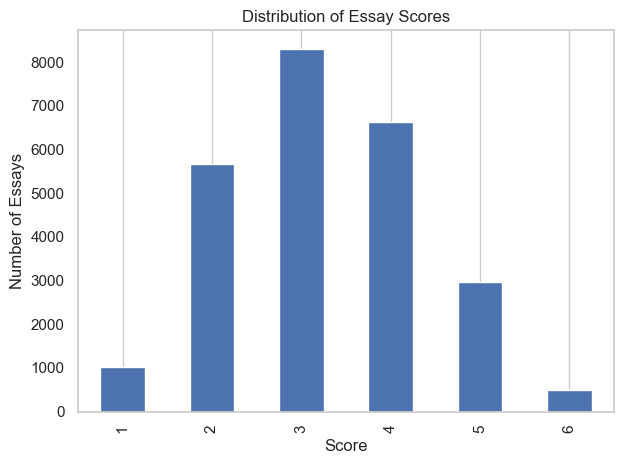

In [230]:
import matplotlib.pyplot as plt

df["holistic_essay_score"].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Essay Scores")
plt.xlabel("Score")
plt.ylabel("Number of Essays")
plt.grid(axis="y")
plt.tight_layout()

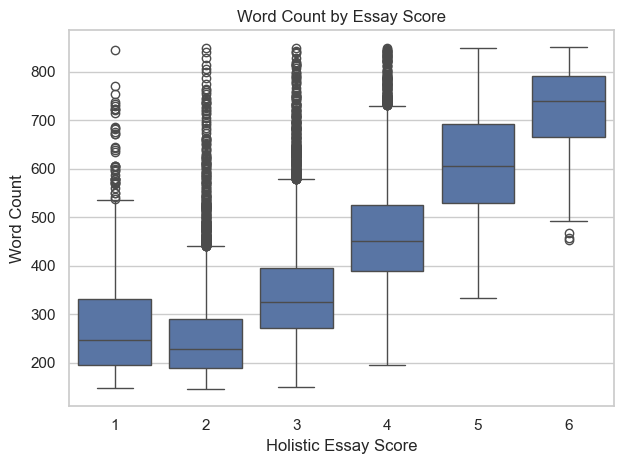

In [231]:
import seaborn as sns

sns.boxplot(data=df, x="holistic_essay_score", y="word_count")
plt.title("Word Count by Essay Score")
plt.xlabel("Holistic Essay Score")
plt.ylabel("Word Count")
plt.tight_layout()

#### Tagged Dataset

In [238]:
stance_labels = {0: "PRO", 1: "CON", 2: "NEUTRAL"}
sentiment_labels = {0: "POSITIVE", 1: "NEGATIVE"}
formality_labels = {0: "FORMAL", 1: "INFORMAL"}

# load tagged dataset
df_tagged = pd.read_csv("persuade/tagged_persuade.csv")
print("Tagged shape:", df_tagged.shape)
df_tagged.head()

Tagged shape: (25078, 8)


,essay_id_comp,full_text,holistic_essay_score,word_count,prompt_name,stance,formality,sentiment
0,423A1CA112E2,phones\n\nmodern humans today are always on th...,3,378,Phones and driving,2.0,0,0.0
1,BC75783F96E3,this essay will explain if drivers should or s...,4,432,Phones and driving,1.0,0,0.0
2,74C8BC7417DE,driving while the use of cellular devices\n\nt...,2,179,Phones and driving,1.0,0,1.0
3,A8445CABFECE,phones & driving\n\ndrivers should not be able...,3,221,Phones and driving,1.0,1,1.0
4,6B4F7A0165B9,cell phone operation while driving\n\nthe abil...,4,334,Phones and driving,1.0,0,1.0


In [64]:
# count nulls (classification errors)
null_counts = df_tagged[["stance", "sentiment", "formality"]].isnull().sum()
total_rows = len(df)
null_percentages = (null_counts / total_rows * 100).round(2)
null_report = pd.DataFrame({
    "null count": null_counts,
    "percent (%)": null_percentages
})

null_report

,null count,percent (%)
stance,265,1.06
sentiment,342,1.36
formality,0,0.00


In [65]:
# drop null values
stance_df = df_tagged[df_tagged["stance"].notnull()]
sentiment_df = df_tagged[df_tagged["sentiment"].notnull()]
formality_df = df_tagged[df_tagged["formality"].notnull()]

In [66]:
stance_df["stance"].map(stance_labels).value_counts().reindex(["PRO", "CON", "NEUTRAL"])

stance
PRO        16071
CON         7518
NEUTRAL     1224
Name: count, dtype: int64

In [67]:
sentiment_df["sentiment"].map(sentiment_labels).value_counts().reindex(["POSITIVE", "NEGATIVE"])

sentiment
POSITIVE    17903
NEGATIVE     6833
Name: count, dtype: int64

In [68]:
formality_df["formality"].map(formality_labels).value_counts().reindex(["FORMAL", "INFORMAL"])

formality
FORMAL      20245
INFORMAL     4833
Name: count, dtype: int64

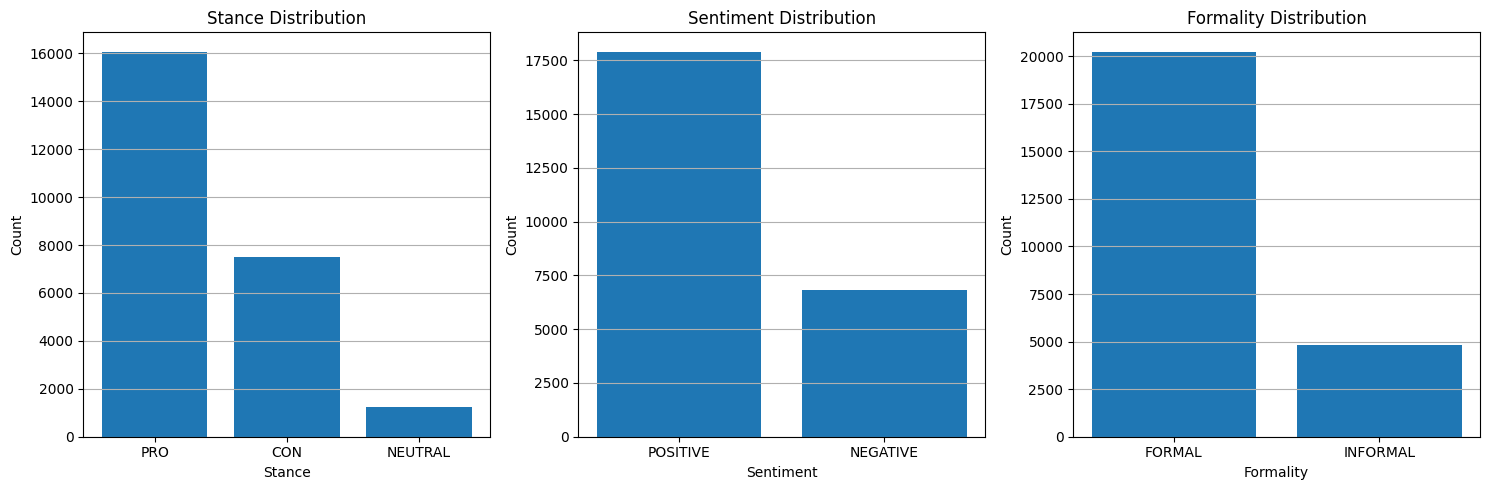

In [62]:
# fig and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# stance
stance_counts = stance_df["stance"].value_counts().sort_index()
axes[0].bar(stance_counts.index, stance_counts.values)
axes[0].set_title("Stance Distribution")
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(["PRO", "CON", "NEUTRAL"])
axes[0].set_xlabel("Stance")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y")

# sentiment
sentiment_counts = sentiment_df["sentiment"].value_counts().sort_index()
axes[1].bar(sentiment_counts.index, sentiment_counts.values)
axes[1].set_title("Sentiment Distribution")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["POSITIVE", "NEGATIVE"])
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y")

# formality
formality_counts = formality_df["formality"].value_counts().sort_index()
axes[2].bar(formality_counts.index, formality_counts.values)
axes[2].set_title("Formality Distribution")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["FORMAL", "INFORMAL"])
axes[2].set_xlabel("Formality")
axes[2].set_ylabel("Count")
axes[2].grid(axis="y")

plt.tight_layout()

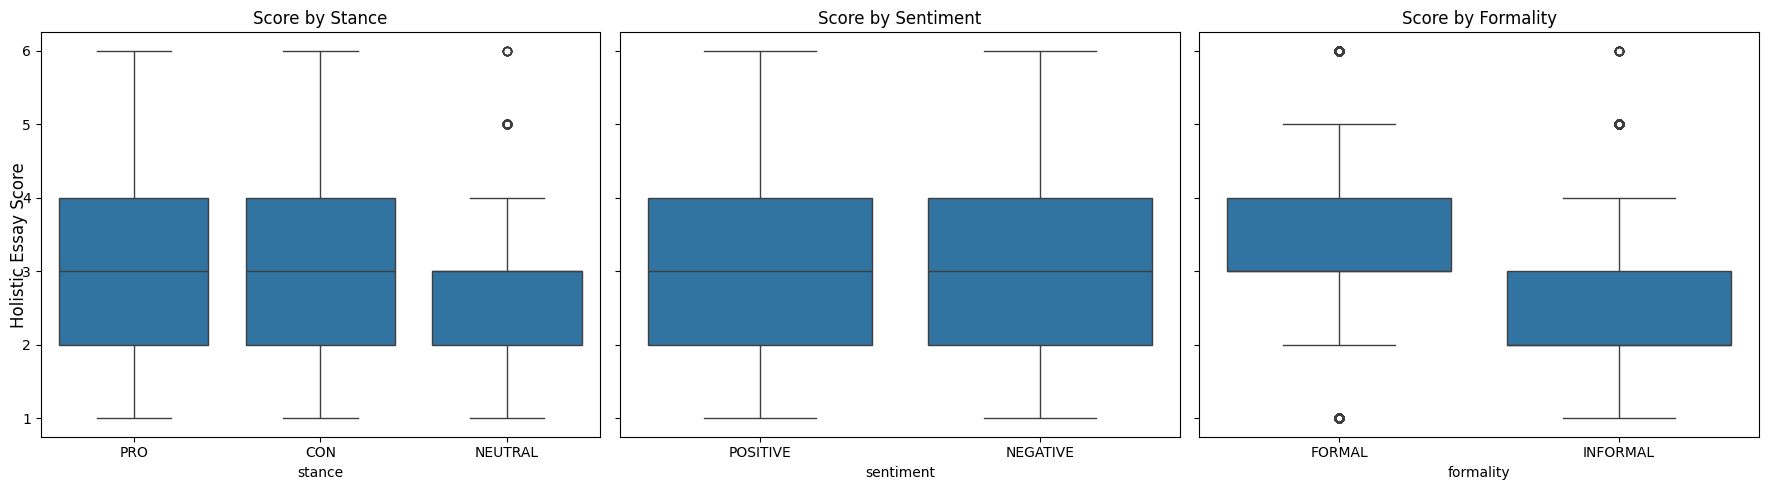

In [76]:
# plot essay score per attribute
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# stance
sns.boxplot(x='stance', y='holistic_essay_score', data=df_clean, ax=axes[0])
axes[0].set_title("Score by Stance")
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['PRO', 'CON', 'NEUTRAL'])

# sentiment
sns.boxplot(x='sentiment', y='holistic_essay_score', data=df_clean, ax=axes[1])
axes[1].set_title("Score by Sentiment")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['POSITIVE', 'NEGATIVE'])

# formality
sns.boxplot(x='formality', y='holistic_essay_score', data=df_clean, ax=axes[2])
axes[2].set_title("Score by Formality")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['FORMAL', 'INFORMAL'])

fig.supylabel("Holistic Essay Score")

# remove y label
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()

In [221]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# prepare data
df = df_clean.dropna(subset=["stance", "sentiment", "formality", "holistic_essay_score"])
df.loc[:, "stance"] = df["stance"].astype(int)
df.loc[:, "sentiment"] = df["sentiment"].astype(int)
df.loc[:, "formality"] = df["formality"].astype(int)
df.loc[:, "holistic_essay_score"] = df["holistic_essay_score"].astype(int)

# fit regression model
model = OrderedModel(
    df["holistic_essay_score"],
    pd.get_dummies(df[["stance", "sentiment", "formality"]], drop_first=True),
    distr="logit"
)
res = model.fit(method='bfgs')
res.summary()

stance
0    15919
1     7355
2     1203
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 1.459950
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                              
================================================================================
Dep. Variable:     holistic_essay_score   Log-Likelihood:                -35735.
Model:                     OrderedModel   AIC:                         7.149e+04
Method:              Maximum Likelihood   BIC:                         7.155e+04
Date:                  Mon, 30 Jun 2025                                         
Time:                          15:42:23                                         
No. Observations:                 24477                                         
Df Residuals:                     24469                                         
Df Model:                             3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
stance        -0.2417      0.022    -10.842      0.000      -0.285      -0.198
sentiment      0.2188      0.029      7.611      0.000       0.162       0.275
formality     -1.5191      0.031    -48.701      0.000      -1.580      -1.458
1/2           -3.7093      0.036   -101.943      0.000      -3.781      -3.638
2/3            0.8302      0.014     59.432      0.000       0.803       0.858
3/4            0.4248      0.010     42.470      0.000       0.405       0.444
4/5            0.4028      0.011     35.161      0.000       0.380       0.425
5/6            0.7412      0.021     36.088      0.000       0.701       0.782
==============================================================================
"""

In [223]:
import itertools

# regression coefficients
coeffs = {
    'stance': -0.2417,
    'sentiment': 0.2188,
    'formality': -1.5191
}

# get combinations of attributes
combinations = list(itertools.product([0, 1], [0, 1], [0, 1, 2]))  # sentiment, formality, stance

# get total score advantage per combination
results = []
for sentiment, formality, stance in combinations:
    score = (
        sentiment * coeffs['sentiment'] +
        formality * coeffs['formality'] +
        stance * coeffs['stance']
    )
    results.append({
        'sentiment': 'NEGATIVE' if sentiment else 'POSITIVE',
        'formality': 'INFORMAL' if formality else 'FORMAL',
        'stance': ['PRO', 'CON', 'NEUTRAL'][stance],
        'score_advantage': score
    })

# sort and show
df = pd.DataFrame(results)
df_sorted = df.sort_values(by='score_advantage', ascending=False)
df_sorted

,sentiment,formality,stance,score_advantage
6,NEGATIVE,FORMAL,PRO,0.2188
0,POSITIVE,FORMAL,PRO,0.0000
7,NEGATIVE,FORMAL,CON,-0.0229
1,POSITIVE,FORMAL,CON,-0.2417
8,NEGATIVE,FORMAL,NEUTRAL,-0.2646
2,POSITIVE,FORMAL,NEUTRAL,-0.4834
9,NEGATIVE,INFORMAL,PRO,-1.3003
3,POSITIVE,INFORMAL,PRO,-1.5191
10,NEGATIVE,INFORMAL,CON,-1.5420
4,POSITIVE,INFORMAL,CON,-1.7608


#### Scored Dataset

In [117]:
import os
import pandas as pd

# strings for file loading
base_folder = "counterfactuals_scored"
models = ["gemma3", "llama3", "qwen3", "deepseek"]
filenames = [
    "formality_formal_to_informal_scored.csv",
    "formality_informal_to_formal_scored.csv",
    "sentiment_negative_to_positive_scored.csv",
    "sentiment_positive_to_negative_scored.csv",
    "stance_con_to_pro_scored.csv",
    "stance_pro_to_con_scored.csv"
]

all_data = []
for model in models:
    for fname in filenames:
        fpath = os.path.join(base_folder, model, fname)
        if os.path.exists(fpath):
            df = pd.read_csv(fpath)
            df['model'] = model
            df['direction'] = fname.replace("_scored.csv", "")
            all_data.append(df)
        else:
            print(f"Missing file: {fpath}")

# combine all into a single dataframe
df_all = pd.concat(all_data, ignore_index=True)

# separate essay_code into two attributes
df_all['version'] = df_all['essay_code'].apply(lambda x: 'OR' if x.endswith('-O') else 'CF')
df_all['essay_id'] = df_all['essay_code'].str.extract(r'(\d+)-')[0].astype(int)

# sort and show
df_all.sort_values(by=['model', 'direction', 'essay_id', 'version'], inplace=True)
df_all = df_all.dropna(subset=["score_llm"]).reset_index(drop=True)
df_all

,essay_code,full_text,attribute,label,score_og,score_llm,model,direction,version,essay_id
0,354-CFO,"cell phone use while driving is, like, a reall...",formality,1,4,6.0,deepseek,formality_formal_to_informal,CF,354
1,354-O,cell phone use while driving is one of those h...,formality,0,4,6.0,deepseek,formality_formal_to_informal,OR,354
2,440-CFO,phones and driving\n\neveryday people die in c...,formality,1,3,6.0,deepseek,formality_formal_to_informal,CF,440
3,440-O,phones and driving\n\neveryday people die in c...,formality,0,3,6.0,deepseek,formality_formal_to_informal,OR,440
4,467-CFO,cell phones? pretty much everyone’s got one th...,formality,1,4,6.0,deepseek,formality_formal_to_informal,CF,467
...,...,...,...,...,...,...,...,...,...,...
4772,24015-O,is it better fro you to ask for more advice or...,stance,0,3,5.0,qwen3,stance_pro_to_con,OR,24015
4773,24395-CST,"in 2002, a study showed that only 23% of ameri...",stance,1,5,5.0,qwen3,stance_pro_to_con,CF,24395
4774,24395-O,"in 2002, a study showed that only 23% of ameri...",stance,0,5,5.0,qwen3,stance_pro_to_con,OR,24395
4775,24743-CST,"have you ever been stuck, not knowing what cho...",stance,1,6,5.0,qwen3,stance_pro_to_con,CF,24743


In [224]:
# Count the number of originals and counterfactuals per model
cf_counts = df_all.groupby(['model', 'version']).size().unstack(fill_value=0)
cf_counts

version,CF,OR
model,,
deepseek,588,589
gemma3,600,600
llama3,600,600
qwen3,600,600


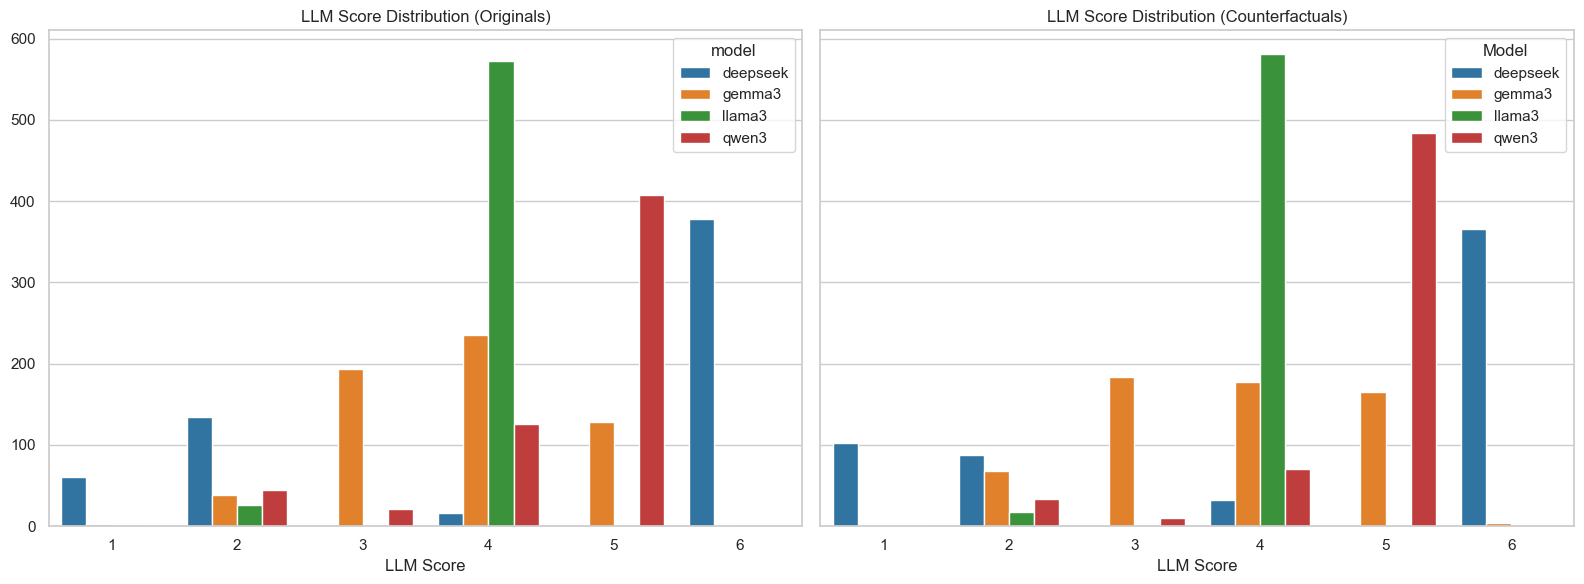

In [183]:
# cast score_llm to number
df_all["score_llm"] = pd.to_numeric(df_all["score_llm"], errors='coerce')

# get cfs and originals
df_orig = df_all[df_all["essay_code"].str.contains("-O")]
df_cf = df_all[df_all["essay_code"].str.contains("-C")]

# handle order and colors
score_order = sorted(df_all["score_llm"].dropna().unique())
model_list = sorted(df_all["model"].dropna().unique())  # Ensures consistent model ordering
model_palette = sns.color_palette("tab10", len(model_list))
model_colors = dict(zip(model_list, model_palette))

# subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# original plot
sns.countplot(
    data=df_orig, x="score_llm", hue="model",
    order=score_order, hue_order=model_list,
    ax=axes[0], palette=model_colors
)
axes[0].set_title("LLM Score Distribution (Originals)")
axes[0].set_xlabel("LLM Score")
axes[0].set_ylabel("")

# cf plot
sns.countplot(
    data=df_cf, x="score_llm", hue="model",
    order=score_order, hue_order=model_list,
    ax=axes[1], palette=model_colors
)
axes[1].set_title("LLM Score Distribution (Counterfactuals)")
axes[1].set_xlabel("LLM Score")
axes[1].set_ylabel("Count")
axes[1].legend(title="Model")

plt.tight_layout()

Text(0.5, 0.98, 'Original vs Counterfactual LLM Score Distribution by direction and model')

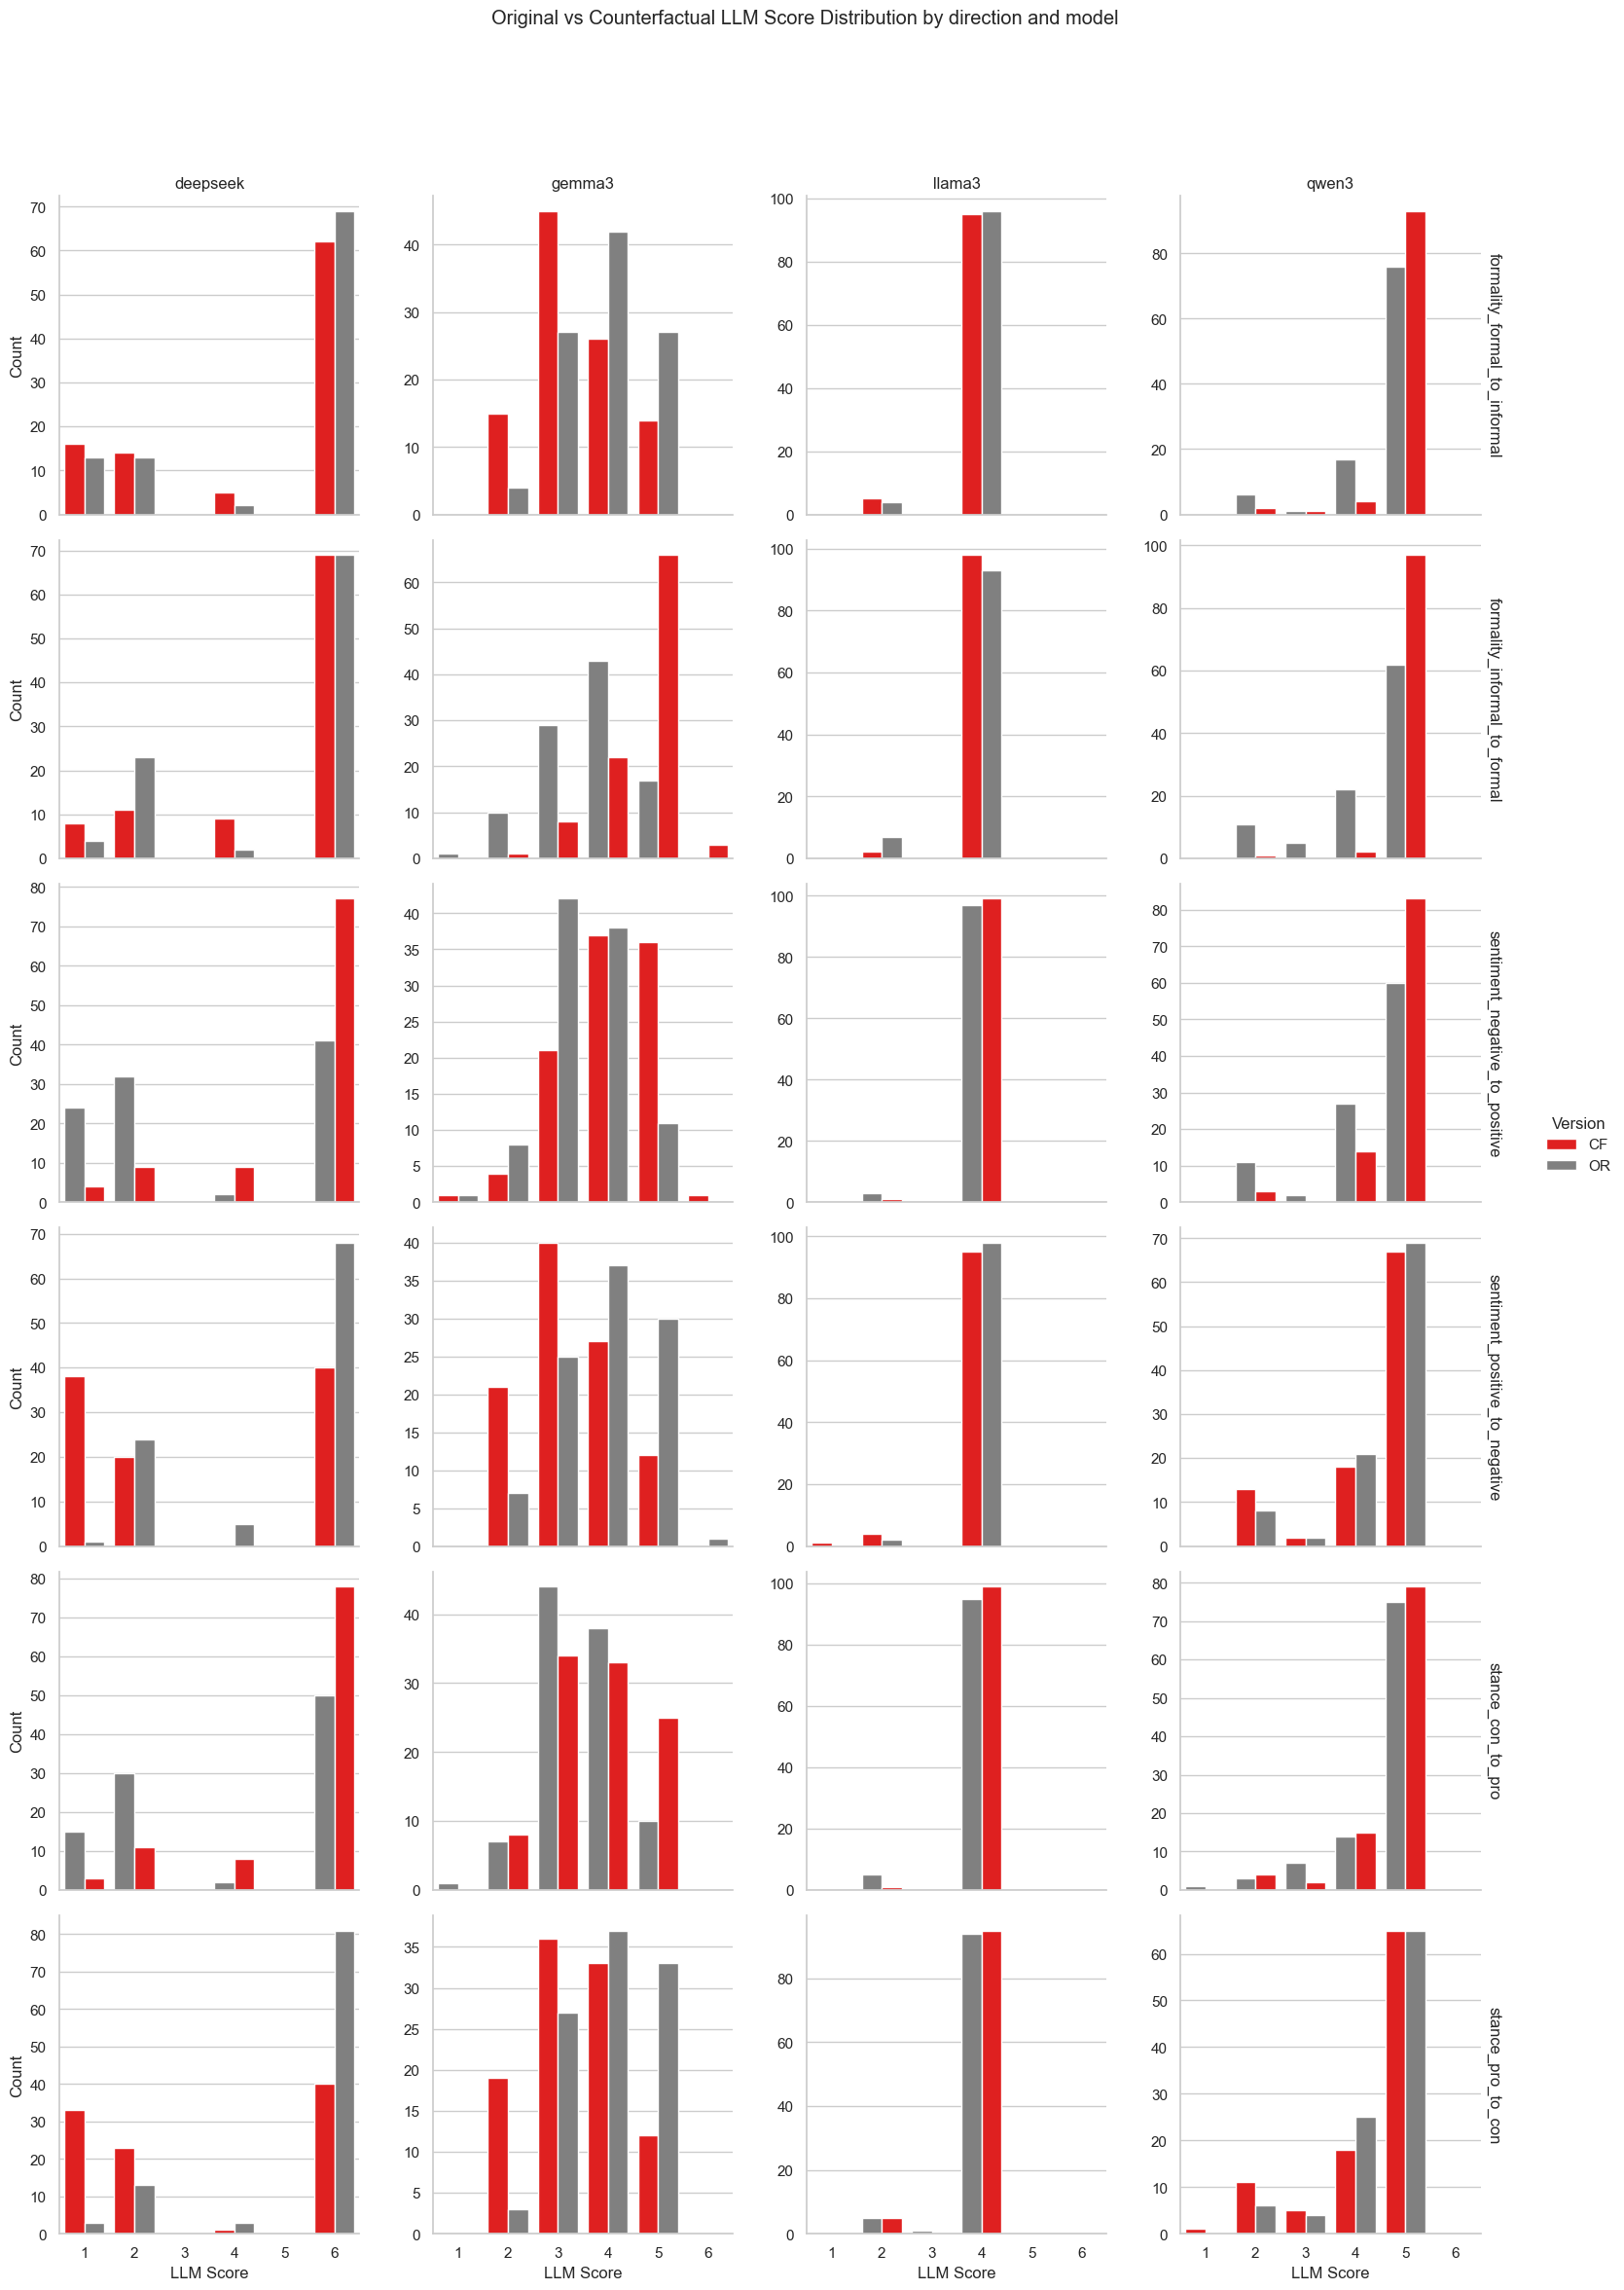

In [194]:
# filter df
df_subset = df_all[df_all['version'].isin(['OR', 'CF'])].copy()

# handle order
score_order = sorted(df_subset['score_llm'].unique())

# plots
g = sns.FacetGrid(
    df_subset,
    row="direction",
    col="model",
    height=4,
    margin_titles=True,
    sharey=False
)
g.map_dataframe(
    sns.countplot,
    x="score_llm",
    hue="version",
    palette={"OR": "gray", "CF": "red"},
    order=score_order
)

# plot details
g.set_axis_labels("LLM Score", "Count")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.add_legend(title="Version")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Original vs Counterfactual LLM Score Distribution by direction and model")

In [187]:
# get metrics
summary_metrics = (
    df_all[df_all["version"].isin(["OR", "CF"])]
    .groupby(["model", "direction", "version"])["score_llm"]
    .agg(["count", "mean", "std", "median", "min", "max"])
    .reset_index()
    .sort_values(by=["model", "direction", "version"])
)

summary_metrics

,model,direction,version,count,mean,std,median,min,max
0,deepseek,formality_formal_to_informal,CF,97,4.494845,2.102200,6.0,1,6
1,deepseek,formality_formal_to_informal,OR,97,4.752577,2.015724,6.0,1,6
2,deepseek,formality_informal_to_formal,CF,97,4.948454,1.781684,6.0,1,6
3,deepseek,formality_informal_to_formal,OR,98,4.816327,1.868606,6.0,1,6
4,deepseek,sentiment_negative_to_positive,CF,99,5.252525,1.514174,6.0,1,6
5,deepseek,sentiment_negative_to_positive,OR,99,3.454545,2.209778,2.0,1,6
6,deepseek,sentiment_positive_to_negative,CF,98,3.244898,2.328936,2.0,1,6
7,deepseek,sentiment_positive_to_negative,OR,98,4.867347,1.768206,6.0,1,6
8,deepseek,stance_con_to_pro,CF,100,5.250000,1.513408,6.0,1,6
9,deepseek,stance_con_to_pro,OR,97,3.948454,2.176442,6.0,1,6


In [192]:
mean_diff_df = (
    df_all[df_all["version"].isin(["OR", "CF"])]
    .groupby(["model", "direction", "version"])["score_llm"]
    .mean()
    .unstack("version")
    .reset_index()
)

# difference: CF - OR (positive = score went up after cf)
mean_diff_df["diff"] = mean_diff_df["CF"] - mean_diff_df["OR"]
mean_diff_df["change"] = mean_diff_df["diff"].apply(
    lambda x: "increase" if x > 0 else "decrease" if x < 0 else "no change"
)

mean_diff_df

version,model,direction,CF,OR,diff,change
0,deepseek,formality_formal_to_informal,4.494845,4.752577,-0.257732,decrease
1,deepseek,formality_informal_to_formal,4.948454,4.816327,0.132127,increase
2,deepseek,sentiment_negative_to_positive,5.252525,3.454545,1.797980,increase
3,deepseek,sentiment_positive_to_negative,3.244898,4.867347,-1.622449,decrease
4,deepseek,stance_con_to_pro,5.250000,3.948454,1.301546,increase
5,deepseek,stance_pro_to_con,3.329897,5.270000,-1.940103,decrease
6,gemma3,formality_formal_to_informal,3.390000,3.920000,-0.530000,decrease
7,gemma3,formality_informal_to_formal,4.620000,3.650000,0.970000,increase
8,gemma3,sentiment_negative_to_positive,4.060000,3.500000,0.560000,increase
9,gemma3,sentiment_positive_to_negative,3.300000,3.930000,-0.630000,decrease


In [193]:
avg_diff = (
    mean_diff_df
    .groupby("direction")["diff"]
    .mean()
    .reset_index()
    .rename(columns={"diff":"avg_diff_all_models"})
)

change_counts = (
    mean_diff_df
    .groupby(["direction","change"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

direction_summary = avg_diff.merge(change_counts, on="direction")

direction_summary

,direction,avg_diff_all_models,decrease,increase
0,formality_formal_to_informal,-0.139433,3,1
1,formality_informal_to_formal,0.450532,0,4
2,sentiment_negative_to_positive,0.701995,0,4
3,sentiment_positive_to_negative,-0.610612,4,0
4,stance_con_to_pro,0.435387,0,4
5,stance_pro_to_con,-0.672526,3,1


In [213]:
# load tagged dataset
df = pd.read_csv("persuade/tagged_persuade.csv").dropna(subset=["stance", "sentiment", "formality", "holistic_essay_score"])

# make sure numeric
df["stance"] = df["stance"].astype(int)
df["sentiment"] = df["sentiment"].astype(int)
df["formality"] = df["formality"].astype(int)

# mean by group
human_means = {
    "stance": df.groupby("stance") ["holistic_essay_score"].mean(),
    "sentiment": df.groupby("sentiment") ["holistic_essay_score"].mean(),
    "formality": df.groupby("formality") ["holistic_essay_score"].mean(),
}

# get human gaps
human_gaps = {
    "stance_PRO_vs_CON": human_means["stance"][0] - human_means["stance"][1],
    "sent_POS_vs_NEG": human_means["sentiment"][0] - human_means["sentiment"][1],
    "formal_vs_informal": human_means["formality"][0] - human_means["formality"][1],
}

for k,v in human_gaps.items():
    print(f"{k:24s} {v:+0.2f}")

stance_PRO_vs_CON        +0.02
sent_POS_vs_NEG          -0.01
formal_vs_informal       +0.87


### Metrics

In [198]:
from sklearn.metrics import cohen_kappa_score

# compute qwk function
def compute_qwk(df):
    df_clean = df.dropna(subset=["score_og", "score_llm"])
    originals = df_clean[df_clean["essay_code"].str.endswith("-O")]
    cf = df_clean[df_clean["essay_code"].str.contains("-C")]
    qwk_orig = cohen_kappa_score(originals["score_og"], originals["score_llm"], weights='quadratic')
    qwk_cf = cohen_kappa_score(cf["score_og"], cf["score_llm"], weights='quadratic')

    return qwk_orig, qwk_cf

models = ["gemma3","llama3","qwen3","deepseek"]
attributes = {
    "stance": [("pro_to_con","PRO→CON"), ("con_to_pro","CON→PRO")],
    "sentiment": [("positive_to_negative","POS→NEG"), ("negative_to_positive","NEG→POS")],
    "formality": [("formal_to_informal","FORM→INFORM"), ("informal_to_formal","INFORM→FORM")],
}

base_dir = "counterfactuals_scored"

for model in models:
    print(f"\n=== Model: {model} ===")
    for attr, directions in attributes.items():
        for fname, label in directions:
            path = os.path.join(base_dir, model, f"{attr}_{fname}_scored.csv")
            df = pd.read_csv(path)
            qwk_orig, qwk_cf = compute_qwk(df)

            print(f"{attr.upper()} {label}: QWK(Orig)={qwk_orig:.4f}, QWK(CF)={qwk_cf:.4f}")


=== Model: gemma3 ===
STANCE PRO→CON: QWK(Orig)=0.3673, QWK(CF)=0.3003
STANCE CON→PRO: QWK(Orig)=0.5573, QWK(CF)=0.3524
SENTIMENT POS→NEG: QWK(Orig)=0.4284, QWK(CF)=0.3426
SENTIMENT NEG→POS: QWK(Orig)=0.5625, QWK(CF)=0.2925
FORMALITY FORM→INFORM: QWK(Orig)=0.4385, QWK(CF)=0.4490
FORMALITY INFORM→FORM: QWK(Orig)=0.4296, QWK(CF)=0.1951

=== Model: llama3 ===
STANCE PRO→CON: QWK(Orig)=0.0851, QWK(CF)=0.1385
STANCE CON→PRO: QWK(Orig)=0.0940, QWK(CF)=-0.0174
SENTIMENT POS→NEG: QWK(Orig)=0.0308, QWK(CF)=0.0557
SENTIMENT NEG→POS: QWK(Orig)=0.1043, QWK(CF)=0.0276
FORMALITY FORM→INFORM: QWK(Orig)=0.0874, QWK(CF)=0.0471
FORMALITY INFORM→FORM: QWK(Orig)=0.0652, QWK(CF)=0.0071

=== Model: qwen3 ===
STANCE PRO→CON: QWK(Orig)=0.2093, QWK(CF)=0.2455
STANCE CON→PRO: QWK(Orig)=0.2064, QWK(CF)=0.0928
SENTIMENT POS→NEG: QWK(Orig)=0.2471, QWK(CF)=0.2342
SENTIMENT NEG→POS: QWK(Orig)=0.2725, QWK(CF)=0.0617
FORMALITY FORM→INFORM: QWK(Orig)=0.1883, QWK(CF)=0.0660
FORMALITY INFORM→FORM: QWK(Orig)=0.1836, QWK(

In [225]:
import numpy as np


def compute_osd_csd(df_subset):
    # drop any rows missing either score
    df = df_subset.dropna(subset=['score_og', 'score_llm', 'label'])
    df['label'] = df['label'].astype(int)

    # osd = mean(score_llm | label==1) - mean(score_llm | label==0)
    mean1 = df.loc[df['label'] == 1, 'score_llm'].mean()
    mean0 = df.loc[df['label'] == 0, 'score_llm'].mean()
    osd = mean1 - mean0

    # csd = average over each true score of (mean1 − mean0)
    cds = []
    for true_score in sorted(df['score_og'].unique()):
        sub = df[df['score_og'] == true_score]
        # require at least one example of each label
        if set(sub['label']) >= {0, 1}:
            m1 = sub.loc[sub['label'] == 1, 'score_llm'].mean()
            m0 = sub.loc[sub['label'] == 0, 'score_llm'].mean()
            cds.append(m1 - m0)
    csd = np.mean(cds) if cds else np.nan

    return osd, csd

# iterate
results = []
for model in df_all['model'].unique():
    df_m = df_all[df_all['model'] == model]
    for direction in df_m['direction'].unique():
        df_md = df_m[df_m['direction'] == direction]
        osd, csd = compute_osd_csd(df_md)
        results.append({
            'model':    model,
            'direction':direction,
            'OSD':      osd,
            'CSD':      csd
        })

osd_csd_df = pd.DataFrame(results)
osd_csd_df

,model,direction,OSD,CSD
0,deepseek,formality_formal_to_informal,-0.257732,-0.554282
1,deepseek,formality_informal_to_formal,-0.132127,-0.022801
2,deepseek,sentiment_negative_to_positive,-1.797980,-1.736527
3,deepseek,sentiment_positive_to_negative,-1.622449,-2.198890
4,deepseek,stance_con_to_pro,-1.301546,-1.376054
5,deepseek,stance_pro_to_con,-1.940103,-1.572273
6,gemma3,formality_formal_to_informal,-0.530000,-0.488484
7,gemma3,formality_informal_to_formal,-0.970000,-0.733420
8,gemma3,sentiment_negative_to_positive,-0.560000,-0.574573
9,gemma3,sentiment_positive_to_negative,-0.630000,-0.464304
